In [1]:
import os
import pandas as pd 
import numpy as np
import gudhi
import json
import classifier
import region
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN

In [128]:
from importlib import reload
reload(classifier)
reload(region)

<module 'region' from 'D:\\PROJECT\\seminconductor\\code\\data2\\region.py'>

In [3]:
def make_data_dictionary(basic_path='./'):
    file_list=os.listdir(basic_path)
    result_dict={'good':[],'bad':[]}
    for file_name in file_list:
        if 'Fault' in file_name:
            work_list=result_dict['bad']
        else:
            work_list=result_dict['good']
        data_frame=pd.read_csv(os.path.join(basic_path,file_name))
        data_frame=data_frame.fillna(0)
        for col_i in range(1,len(data_frame.columns)):
            work_list.append(list(data_frame.iloc[:,col_i]))
    return result_dict

In [4]:
basic_path='./FDC_DATA/tcmp'
data_dict=make_data_dictionary(basic_path)

In [129]:
cl=classifier.Classifier(dim=5,delay=2)
cl.set_db_params(eps=0.2,min_samples=5)

In [130]:
train_data=data_dict['good'][:100]

In [131]:
test_data=data_dict['good'][100:]

In [132]:
cl.train(train_data)

[[29.40946632 29.78805283]
 [29.32606969 29.752862  ]
 [29.27138399 29.7375801 ]
 [29.27699981 29.82961601]
 [29.26753894 29.72574847]
 [29.22395305 29.70828617]
 [29.30226142 29.74414323]
 [29.28393207 29.66467397]
 [29.47321522 29.86287164]
 [29.35564719 29.84263212]
 [29.30826911 29.7700876 ]
 [29.32606831 29.73872752]
 [29.22467593 29.66270729]
 [29.25397203 29.70139326]
 [29.21972947 29.77011005]
 [29.28427997 29.68402881]
 [29.25270276 29.70690214]
 [29.21715995 29.78425277]
 [29.2942457  29.70035732]
 [29.28116832 29.66934353]
 [29.25799148 29.69084956]
 [29.22681722 29.66344561]
 [29.19493112 29.67963394]
 [29.29013594 29.69690767]
 [29.25513301 29.71767392]
 [29.26873054 29.74784045]
 [29.20566216 29.62625632]
 [29.28616521 29.71544907]
 [29.28310753 29.69600946]
 [29.27560102 29.72761911]
 [29.24955696 29.65317565]
 [29.23246811 29.72206008]
 [29.43456542 29.78531483]
 [29.37892941 29.81560732]
 [29.33472147 29.74681428]
 [29.2782265  29.70283069]
 [29.27058984 29.66466271]
 

[[27.58644301 28.20157864]
 [27.57814163 28.15093802]
 [27.66659082 28.23627613]
 ...
 [27.39028819 27.53637495]
 [27.77587757 27.82822287]
 [27.79181293 27.83980242]]
[[29.54476744 29.54828936]
 [29.5465254  29.54678651]
 [29.55111387 29.55449778]
 [29.55310637 29.55318973]
 [29.55559672 29.55856676]
 [29.55705668 29.55713229]
 [29.68893254 29.68906341]
 [29.53752515 29.53980894]
 [29.5395983  29.53980637]
 [29.53618602 29.53772692]
 [29.53829269 29.53832004]
 [29.55061794 29.55349274]
 [29.5528875  29.55289852]
 [29.42534787 29.42865364]
 [29.61324233 29.61569965]
 [29.61296468 29.6129651 ]
 [29.67221667 29.67446806]
 [29.67303409 29.67308664]
 [29.58740013 29.59048396]
 [29.58910235 29.58919846]
 [29.52668523 29.52926722]
 [29.52919093 29.52921129]
 [29.46980253 29.47173246]
 [29.4721563  29.47238142]
 [29.50378418 29.50553739]
 [29.50704155 29.50713181]
 [29.6367677  29.63726307]
 [29.63878552 29.63880899]
 [29.45926432 29.46234114]
 [29.4626062  29.46292893]
 [29.47108815 29.47112

[[ 6.1653055  26.79194679]
 [ 6.11080625 26.80008599]
 [ 6.1306035  26.78332991]
 [ 6.12613125 26.85484223]
 [ 6.1306105  26.76864101]
 [ 6.12158925 26.74633512]
 [ 6.11590225 26.79088722]
 [ 6.1009095  26.71999812]
 [ 6.18272575 26.85595958]
 [ 6.1429975  26.86680042]
 [ 6.1487225  26.82037306]
 [ 6.1408245  26.76792629]
 [ 6.1062175  26.71171863]
 [ 6.12891175 26.74527318]
 [ 6.101234   26.79338306]
 [ 6.1356025  26.74475204]
 [ 6.12091425 26.76719174]
 [ 6.1117025  26.82276313]
 [ 6.1305805  26.75871891]
 [ 6.1384635  26.7192609 ]
 [ 6.15099875 26.74407077]
 [ 6.12433725 26.71822699]
 [ 6.120757   26.73558358]
 [ 6.1306605  26.75612879]
 [ 6.1285865  26.78327476]
 [ 6.15305675 26.79875707]
 [ 6.10338075 26.67993773]
 [ 6.100916   26.76513874]
 [ 6.15300175 26.72756012]
 [ 6.11374975 26.75877529]
 [ 6.14169425 26.70130268]
 [ 6.1314365  26.7661948 ]
 [ 6.160405   26.78566862]
 [ 6.15047075 26.84380858]
 [ 6.13801275 26.79448305]
 [ 6.15858575 26.75296747]
 [ 6.1486535  26.70919909]
 

[[     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 999999.]
 [     0. 99

In [133]:
test_label=list(np.zeros(len(test_data)))+list(np.ones(len(data_dict['bad'])))
test_data=test_data+data_dict['bad']

In [134]:
predict_label=cl.predict(test_data)

In [200]:
result=metrics.confusion_matrix(test_label,predict_label)

In [201]:
result

array([[175,  81],
       [  2,  24]], dtype=int64)

In [135]:
result=metrics.classification_report(test_label,predict_label)

In [136]:
print(result)

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77       330
         1.0       0.17      1.00      0.30        26

    accuracy                           0.65       356
   macro avg       0.59      0.81      0.53       356
weighted avg       0.94      0.65      0.73       356



In [12]:
np.array(test_data[0])

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       2.032, 4.95 , 4.938, 4.951, 4.909, 4.942, 4.95 , 4.95 , 4.939,
       4.932, 4.923, 4.931, 4.942, 4.944, 4.929, 4.95 , 4.974, 4.934,
       4.961, 4.952, 4.963, 4.894, 4.896, 4.931, 4.923, 4.915, 4.882,
       4.867, 4.862, 4.862, 4.835, 4.83 , 4.842, 4.852, 4.858, 4.862,
       4.938, 4.938, 4.913, 4.915, 4.909, 4.896, 4.925, 4.928, 4.921,
       4.944, 4.892, 4.924, 4.93 , 4.936, 4.927, 4.923, 4.934, 4.936,
       4.938, 4.939, 4.928, 4.919, 4.916, 4.925, 4.921, 4.923, 4.935,
       4.928, 4.919, 4.931, 4.94 , 4.933, 4.936, 4.931, 4.929, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [19]:
cl._arrange_persistences([test_data[0]])

TypeError: cannot unpack non-iterable float object

In [37]:
cl.predict(test_data)

KeyboardInterrupt: 

In [85]:
predict_label

[1]

In [38]:
cl.region_dict.keys()

dict_keys([4, 3, 2, 1, 0])

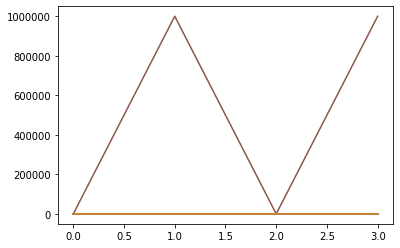

In [65]:
for k in cl.region_dict.keys():
    for j in cl.region_dict[k].region_dict.keys():
        plt.plot(cl.region_dict[k].region_dict[j].polygon.bounds)
#cl.region_dict[4].region_dict[3].polygon

In [74]:
import matplotlib.pyplot as plt

In [77]:
for j in cl.region_dict[2].region_dict.keys():
    print(cl.region_dict[2].region_dict[j].polygon.bounds)

(26.592092858722324, 26.986913664122362, 28.151272565096676, 28.32176971937116)
(29.4073447940647, 29.409512379062043, 29.688932542907875, 29.689063405592627)
(23.461031813027763, 23.461062271187636, 23.676784076412925, 23.676819915089773)
(1.7025806451612304e-05, 1.7382819357480712e-05, 0.008544261226079583, 0.008545454003915844)
(17.57001482622495, 17.57006389107601, 17.73596596898105, 17.736009539235543)
(18.221285624315342, 18.221286749999166, 18.498546272179013, 18.498546745185173)
(12.112494077409883, 12.112494205192508, 12.3604476124449, 12.360449668071825)
(11.673730081013424, 11.673732343353201, 11.80542677007692, 11.805483308686133)
(24.30744902818071, 24.307449071460923, 24.663716300127575, 24.663720446532867)
(6.096040365402301, 6.09604797061559, 6.147959625010088, 6.147960384038374)
(26.40111309397806, 26.598162905127566, 26.79956619926277, 26.818298531199005)


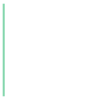

In [70]:
cl.region_dict[0].region_dict[0].polygon

In [88]:
cl=classifier.Classifier(dim=5,delay=2)
cl.set_db_params(eps=0.2,min_samples=5)
cl.train(train_data)

[[29.66568178 29.69764022]
 [29.67287229 29.69967188]
 [29.67685177 29.6993754 ]
 [29.67654529 29.69818744]
 [29.6737314  29.69461809]
 [29.67022941 29.68885774]
 [29.66902402 29.66931226]
 [29.68932898 29.68950196]
 [29.69860988 29.69871008]]
[[0.00048044 0.0004834 ]
 [0.00516083 0.00516234]
 [0.00033295 0.00033445]
 [0.0064181  0.00641915]
 [0.00051658 0.00051696]
 [0.00035979 0.00036012]
 [0.00045682 0.00045699]
 [0.00034139 0.00034147]]
[[28.26000231 28.66433574]
 [28.23308997 28.62981366]
 [28.25265293 28.6423297 ]
 [28.26358163 28.64732653]
 [28.22287802 28.59493361]]
[[28.12362214 28.28271771]
 [28.20246737 28.34854169]
 [28.22288596 28.34264736]
 [28.24331267 28.35579339]
 [28.28878834 28.32550177]
 [28.34736747 28.37060971]]
[[29.65031198 29.67231595]
 [29.64189028 29.66288954]
 [29.63772899 29.65627636]
 [29.6417247  29.65098003]
 [29.66244877 29.67109105]
 [29.66762475 29.67430509]
 [29.55275997 29.55302727]]
[[28.62987882 28.63042436]
 [28.51839423 28.51881895]
 [28.5949359

In [90]:
tmp=np.array([[29.66568178, 29.69764022],
 [29.67287229, 29.69967188],
 [29.67685177, 29.6993754 ],
 [29.67654529, 29.69818744],
 [29.6737314,  29.69461809],
 [29.67022941, 29.68885774],
 [29.66902402, 29.66931226],
 [29.68932898, 29.68950196],
 [29.69860988, 29.69871008]])

In [91]:
tmp.sort(axis=0)

In [92]:
tmp

array([[29.66568178, 29.66931226],
       [29.66902402, 29.68885774],
       [29.67022941, 29.68950196],
       [29.67287229, 29.69461809],
       [29.6737314 , 29.69764022],
       [29.67654529, 29.69818744],
       [29.67685177, 29.69871008],
       [29.68932898, 29.6993754 ],
       [29.69860988, 29.69967188]])

In [93]:
tmp.sort(axis=1)

In [94]:
tmp

array([[29.66568178, 29.66931226],
       [29.66902402, 29.68885774],
       [29.67022941, 29.68950196],
       [29.67287229, 29.69461809],
       [29.6737314 , 29.69764022],
       [29.67654529, 29.69818744],
       [29.67685177, 29.69871008],
       [29.68932898, 29.6993754 ],
       [29.69860988, 29.69967188]])

In [113]:
rest=np.array([[1,20],[3,4],[50,6]])

In [137]:
print(rest.sort(axis=0))

TypeError: 'axis' is an invalid keyword argument for sort()

In [127]:
rest

[[1, 20], [3, 4], [50, 6]]